### **【問題1】SVM分類器のクラスを作成する**

SVM分類器のクラスを作成し、Sprint0で作成した分類のパイプラインに組み込んでください。

クラスの基本構造はSprint3の線形回帰を参考にし、名前はScratchSVMClassifierとしてください。

メソッドやパラメータなどはscikit-learnを参考にしてください。

sklearn.svm.SVC — scikit-learn 0.20.2 documentation

検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

scikit-learnにおけるパラメータについて

scikit-learnの実装はソフトマージンSVMになっています。ハードマージンSVMを再現するには、パラメータCをC=1e10のように非常に大きな値を設定します。（無限大に向けてCを大きくするほどハードマージンSVMに近づきます）

また、線形カーネルをscikit-learnで使う場合はkernel="linear"と指定します。デフォルトではkernel="rbf"になっており、多項式カーネルと呼ばれるものになっています。

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
# class ScratchSVMClassifierProvisional():
    
#     def __init__(self, num_iter, C, alpha):
#         self.iter = num_iter
#         self.C = C
#         self.alpha = alpha
        
#     def _kernel(self, x_0, x_1):
#         return np.dot(x_0, x_1.T)
    
#     def _gradient_descent(self, X):
#         for i in range(self.m):
#             self.lambda_[i] += self.alpha * self._dL(i)
#             if self.lambda_[i] < 0:
#                 self.lambda_[i] == 0
#         return self.lambda_               
    
#     def _dL(self, i):
#         self.dl = 0
#         for j in range(0, self.m):
#             self.lambda_[j] * y[i] * y[j] * self._kernel(X[i], X[j])
#         return (1 - self.dl)
        
#     def fit(self, X, y, X_val=None, y_val=None):
#         self.m = X.shape[0]
#         self.lambda_ = np.random.rand(self.m)
        
#         for i in range(self.iter):
#             self._dL(i)
#             self._gradient_descent(X)
        
#         return self.lambda_
    
#     def predict(self, X):
        
#         pass
#         return

In [138]:
# class ScratchSVMClassifier():
    
#     def __init__(self, num_iter, alpha, lam=1e-5):
#         self.iter = num_iter
#         self.alpha = alpha
#         self.lam = lam
    
#     def _gradient_descent(self, X, y):
#         self.lambda_ += self.alpha * (1 - np.dot(self.lambda_, \
#                                                   (np.dot(y, y.T))*(np.dot(X, X.T))))

#         return self.lambda_
        
#     def fit(self, X, y, X_val=None, y_val=None):
#         self.m = X.shape[0]
#         self.lambda_ = np.random.rand(self.m)
#         self.y = y
        
#         for i in range(self.iter):
#             self._gradient_descent(X, y)
        
#         return self.lambda_
    
#     def predict(self, X, y):       
#         idx_sv = np.where(self.lambda_>self.lam)
#         idx_ord = np.where(self.lambda_<=self.lam)
        
#         self.lambda_[idx_ord] = 0
#         X_spv = X[idx_sv]
#         y_spv = self.y[idx_sv]
         
#         self.lambda_ = self.lambda_[idx_sv]
#         N = len(self.lambda_)
        
        
#         # theta, theta_zeroの定義
#         self.theta = np.dot(self.lambda_ * y_spv, X_spv)
#         self.theta_zero = (y - np.dot(self.theta.T, X_spv)) / max(1, N)
        
#         y_hat = np.dot(self.theta.T, X) + self.theta_zero
#         if y_hat < 0:
#             y_pred = -1
#         else:
#             y_pred = 1
            
#         return y_pred

In [139]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[50:, :]
y = iris.target[50:]
y[50:] = -1

a = np.array([1, 2, 3, 2, 2])
print(a[a!=2])
print(a[(a<3)==True])

[1 3]
[1 2 2 2]


In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [141]:
ssvm = ScratchSVMClassifier(num_iter=1000, alpha=1e-10, lam=1e-5)
ssvm.fit(X_train, y_train)

array([ 0.70131999,  0.28339717,  0.23915119,  0.2973629 ,  0.653265  ,
        0.823611  ,  0.10804969,  0.1631252 ,  0.04218458,  0.19091134,
        0.47426539,  0.34281807,  0.9717341 ,  0.01139455,  0.73694825,
        0.07683829,  0.46882295, -0.01804801,  0.70451456,  0.12594472,
        0.97645267,  0.33103638,  0.00887069,  0.37191776,  0.80117661,
        0.89505431,  0.9798866 ,  0.95514721,  0.12405914,  0.62336682,
        0.53139095,  0.31076305,  0.54355808,  0.59640013,  0.84980444,
        0.27272671,  0.39661451,  0.19286965,  0.91827737,  0.90209415,
        0.9274798 ,  0.32292566,  0.90492834,  0.38802003,  0.32552265,
        0.50334767,  0.79106374,  0.26555351,  0.03633636,  0.3424301 ,
        0.74240149,  0.88005158,  0.49648957,  0.59879351,  0.90350396,
        0.52482411,  0.86436429,  0.12595615,  0.81106128,  0.23858646,
        0.54923472,  0.68970898,  0.41293119,  0.9323023 ,  0.7600137 ,
        0.25233331,  0.3577287 ,  0.48714282,  0.42208595,  0.27

In [142]:
# a = np.array([1, 2, 3, 2, 2])
# print(a[a!=2])
# print(a[(a<3)==True])
# print(np.where(a<3))

In [377]:
class ScratchSVMClassifier_1():
    
    def __init__(self, num_iter, alpha, lam=1e-5):
        self.iter = num_iter
        self.alpha = alpha
        self.lam = lam
    
    def _gradient_descent(self, X, y):
        self.lambda_ += self.alpha * (1 - np.dot(self.lambda_, \
                                                  (np.dot(y, y.T))*(np.dot(X, X.T))))

        return self.lambda_
        
    def fit(self, X, y, X_val=None, y_val=None):
        self.m = X.shape[0]
        self.lambda_ = np.random.rand(self.m)
        self.y = y
        
        for i in range(self.iter):
            self._gradient_descent(X, y)
            
        idx_sv = np.where(self.lambda_>self.lam)
        idx_ord = np.where(self.lambda_<=self.lam)
        
        self.lambda_[idx_ord] = 0
        self.X_sv = X[idx_sv]
        self.y_sv = y[idx_sv]
        
        self.lambda_sv = self.lambda_[idx_sv]
        N = len(self.lambda_sv)
        
        # theta, theta_zeroの定義
        self.theta = np.dot(self.lambda_sv * self.y_sv, self.X_sv)
        # self.theta_zero = (y - np.dot(self.theta.T, X_sv)) / max(1, N)
        
        return self.lambda_
    
    def predict(self, X):       
        y_hat = np.dot(self.theta, X.T)
        y_pred = np.zeros((y_hat.shape[0]))
        for i in range(y_hat.shape[0]):
            if y_hat[i] < 0:
                y_pred[i] = -1
            else:
                y_pred[i] = 1
            
        return y_pred

In [378]:
ssvm1 = ScratchSVMClassifier_1(num_iter=10000, alpha=1e-10, lam=0.7)
ssvm1.fit(X_train, y_train)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.70394862, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.78207601, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.73691149, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.70943373, 0.        ,
       0.        , 0.        , 0.        , 0.76468623, 0.     

In [379]:
pred = ssvm1.predict(X_test)
pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

### **【問題3】指標値の算出**

In [380]:
np.sum((pred == y_test) / y_test.shape[0])

0.44

### **【問題4】決定領域の可視化**

In [381]:
Iris = load_iris()
X_ = Iris.data[50:, [1, 3]]
y_ = Iris.target[50:]

In [382]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_, y_)

In [383]:
ssvm1.fit(X_train1, y_train1)

array([0.        , 0.        , 0.        , 0.        , 0.90682774,
       0.        , 0.        , 0.80775359, 0.        , 0.        ,
       0.7586632 , 0.        , 0.893533  , 0.78140528, 0.76617131,
       0.        , 0.        , 0.91466211, 0.        , 0.        ,
       0.        , 0.        , 0.76173001, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.88555583, 0.85673595, 0.        ,
       0.8213264 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.72226372, 0.        , 0.85721404,
       0.        , 0.71817516, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.80862564,
       0.        , 0.        , 0.        , 0.        , 0.70696605,
       0.        , 0.        , 0.        , 0.71579606, 0.71171526,
       0.        , 0.        , 0.        , 0.77582609, 0.        ,
       0.        , 0.89025568, 0.72082531, 0.        , 0.     

In [384]:
pred1 = ssvm1.predict(X_test1)
np.sum((pred1 == y_test1) / y_test1.shape)

0.52

In [385]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    # plt.scatter(ssvm1.X_sv[:, 0], ssvm1.X_sv[:, 1], color='y')
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

/Users/kobayashishintachi/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: No contour levels were found within the data range.


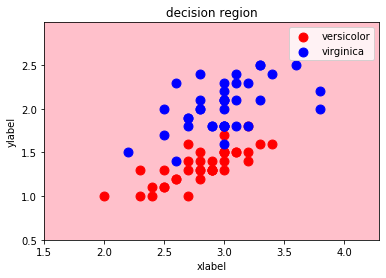

In [386]:
decision_region(X_train1, y_train1, ssvm1, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

In [387]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]
print(len(X), len(y))

500 500


In [388]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y)

In [497]:
ssvm2 = ScratchSVMClassifier_1(num_iter=5000, alpha=1e-9, lam=0.95)

In [498]:
lamlam = ssvm2.fit(X_train2, y_train2)
print(np.where(lamlam==0))
print(lamlam)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  50,  51,  52,
        53,  54,  55,  56,  57,  59,  60,  61,  62,  63,  64,  65,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 179, 180, 181, 182, 183, 184, 185, 1

In [499]:
def decision_region1(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.scatter(ssvm2.X_sv[:, 0], ssvm2.X_sv[:, 1], color='y')
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

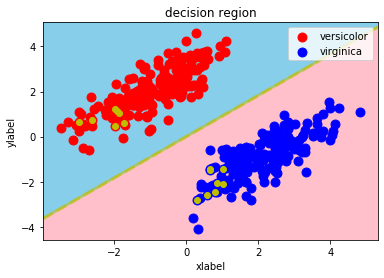

In [500]:
decision_region1(X_train2, y_train2, ssvm2, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

### **【問題5】時間の計測**

In [501]:
import time
t0 = time.time()
class ScratchSVMClassifier_1():
    
    def __init__(self, num_iter, alpha, lam=1e-5):
        self.iter = num_iter
        self.alpha = alpha
        self.lam = lam
    
    def _gradient_descent(self, X, y):
        self.lambda_ += self.alpha * (1 - np.dot(self.lambda_, \
                                                  (np.dot(y, y.T))*(np.dot(X, X.T))))

        return self.lambda_
        
    def fit(self, X, y, X_val=None, y_val=None):
        self.m = X.shape[0]
        self.lambda_ = np.random.rand(self.m)
        self.y = y
        
        for i in range(self.iter):
            self._gradient_descent(X, y)
            
        idx_sv = np.where(self.lambda_>self.lam)
        idx_ord = np.where(self.lambda_<=self.lam)
        
        self.lambda_[idx_ord] = 0
        self.X_sv = X[idx_sv]
        self.y_sv = y[idx_sv]
        
        self.lambda_sv = self.lambda_[idx_sv]
        N = len(self.lambda_sv)
        
        # theta, theta_zeroの定義
        self.theta = np.dot(self.lambda_sv * self.y_sv, self.X_sv)
        # self.theta_zero = (y - np.dot(self.theta.T, X_sv)) / max(1, N)
        
        return self.lambda_
    
    def predict(self, X):       
        y_hat = np.dot(self.theta, X.T)
        y_pred = np.zeros((y_hat.shape[0]))
        for i in range(y_hat.shape[0]):
            if y_hat[i] < 0:
                y_pred[i] = -1
            else:
                y_pred[i] = 1
            
        return y_pred
t1 = time.time()
print('time : {}s'.format(t1-t0))

time : 0.00034308433532714844s
